In [6]:
%matplotlib notebook
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
import scipy
from scipy import stats
from statistics import mode
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d as gf1d
from scipy.ndimage import gaussian_filter as gf
from scipy.ndimage import uniform_filter as uf

from skimage.transform import downscale_local_mean #For binning
from skimage.filters import threshold_otsu, threshold_local

import xarray as xr #package for labeling and adding metadata to multi-dimensional arrays
from statistics import median
from statistics import mode

import sys
#sys.path.append("../kai_colloids/PyDDM") #must point to the PyDDM folder
#import ddm_analysis_and_fitting as ddm   

import tiff_file 

import io 
import sys
import csv

from PIL import Image

import os
import glob #glob is helpful for searching for filenames or directories
import pickle #for saving data
### usually this block prints out "nd2reader module not found. Reading of .nd2 files disabled." on the first run
### this is fine (unless you need to read .nd2 files), just re-run this block to make the error go away

In [7]:
def filter_and_shift(image, filtersize):
    image = (image*1.0) - ((uf(image,filtersize))*1)  #(image) - unifrom-filtered(image) subtracts background
    flat_im = image.ravel()
    shifted_im = flat_im + np.abs(flat_im.min())
    return shifted_im

def subtract_mean_and_shift(image):
    image = (image*1.0) - (np.mean(image))  
    flat_im = image.ravel()
    shifted_im = flat_im + np.abs(flat_im.min())
    return shifted_im

In [64]:
date = "2-1-23"
exp = "AE"

### "data_dir" is the pathway to the folder holding the tiff files to be analyzed --> change to your folder location
data_dir = "Z:\\Maya N\\data\\"+date+"\\"+exp +"\\"
data_save = "Z:\\Maya N\\analysis\\"+date+"\\"+exp +"\\"
### "plot_saveto" is the pathway to the folder where plots and results will be saved
plot_saveto = data_save

files = glob.glob(data_dir+"*tif") ### this should generate an ordered list of files in "data_dir" which have "_t" in their name
print("found %i files" % len(files))
for i,f in enumerate(files): print (' %i \t %s' % (i, f.split('\\')[-1]))

found 4 files
 0 	 AE_1_MMStack_Pos0.ome.tif
 1 	 AE_2_MMStack_Pos0.ome.tif
 2 	 AE_3_MMStack_Pos0.ome.tif
 3 	 AE_4_MMStack_Pos0.ome.tif


<IPython.core.display.Javascript object>


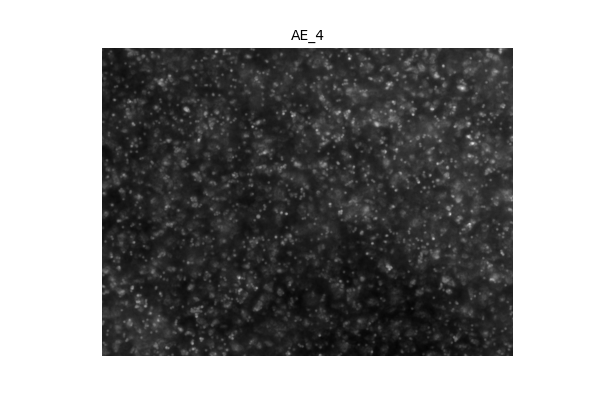

<IPython.core.display.Javascript object>


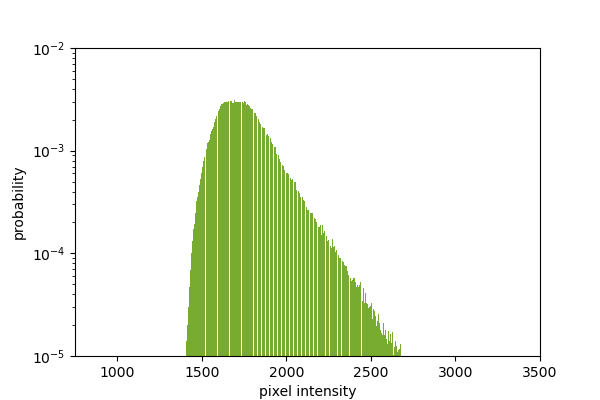

<IPython.core.display.Javascript object>


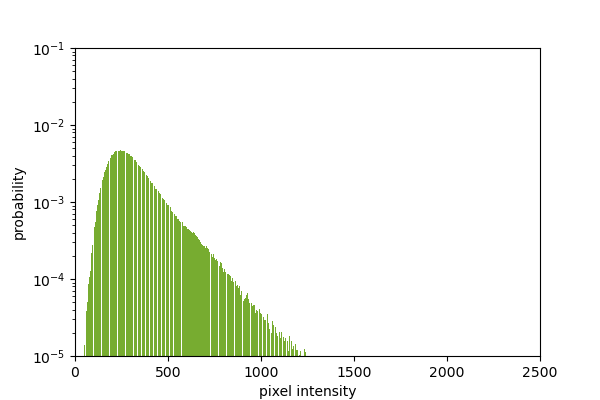

<IPython.core.display.Javascript object>


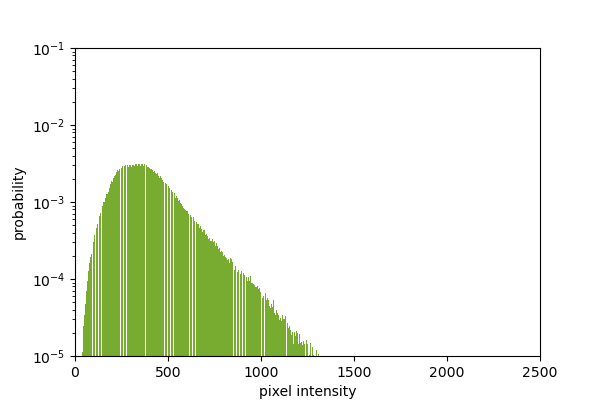

In [68]:
%matplotlib notebook

c = "#77AC30" #AE = #77AC30, EA = blue, WT = magenta

chosen_tiff = files[3]
chosen_image = tiff_file.imread(chosen_tiff,key=[0]) #key=[ ] selects which frame of the tiff file will be read

fig, ax = plt.subplots(figsize=(6,4)) #set up 'figure 1'
title = str((chosen_tiff.split('\\')[-1])[:-21]) #splits the full file name into only the relevent info
ax.set_title(title, fontsize=10)
ax.imshow(chosen_image, cmap='gray') #'cmap' is the color map used to display the image, 'gray' is short for greyscale
ax.axis('off')

#fig, ax2 = plt.subplots(figsize=(6,4)) #set up 'figure 1'
#title = str((chosen_tiff.split('\\')[-1])[:-21]) #splits the full file name into only the relevent info
#ax2.set_title(title, fontsize=10)
#chosen_image = (chosen_image*1.0) - ((uf(chosen_image,1000))*1)  #(image) - unifrom-filtered(image) subtracts background
#ax2.imshow(chosen_image, cmap='gray') #'cmap' is the color map used to display the image, 'gray' is short for greyscale
#ax2.axis('off')

num_of_bins = 2500 # number of histogram bins, changing this effects the histogram (can be set to "auto")

fig, ax3 = plt.subplots(figsize=(6,4)) #set up 'figure 3'
ax3.hist(chosen_image.ravel(), bins=num_of_bins, density = True, color = c) #plots a histogram for a given list; 
                                                 #___.ravel() converts a 2D image array to a 1D list of pixel intensities
ax3.set_xlim(750, 3500)
ax3.set_ylim(10E-6, 10E-3)  
ax3.set_yscale('log')
ax3.set_xlabel("pixel intensity")
ax3.set_ylabel("probability")
fig.savefig(plot_saveto + "probability histogram for " + title + ".jpg")   
plt.show()

fig, ax4 = plt.subplots(figsize=(6,4)) #set up 'figure 4'
intensities_list = filter_and_shift(chosen_image, 1000) 
ax4.hist(intensities_list, bins=num_of_bins, density = True, color = c)
ax4.set_xlim(0,2500)
ax4.set_ylim(10E-6, 10E-2)
ax4.set_yscale('log')
ax4.set_xlabel("pixel intensity")
ax4.set_ylabel("probability")
fig.savefig(plot_saveto + "filtered histogram for " + title + ".jpg")  
plt.show()

fig, ax5 = plt.subplots(figsize=(6,4)) #set up 'figure 5'
intensities_list = subtract_mean_and_shift(chosen_image) #subtract_mean_and_shift
ax5.hist(intensities_list, bins=num_of_bins, density = True, color = c)
ax5.set_xlim(0,2500)
ax5.set_ylim(10E-6, 10E-2)
ax5.set_yscale('log')
ax5.set_xlabel("pixel intensity")
ax5.set_ylabel("probability")
fig.savefig(plot_saveto + "mean subtracted histogram for " + title + ".jpg")  
plt.show()